In [1]:
library(readr)
library(SCDC)
library(gprofiler2)
library(dplyr)
library(Seurat)
library(tidyr)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)

Warning message:
“package ‘SCDC’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp

Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [2]:
df_corps <- readRDS("/home/adufour/work/rds_storage/bulk/bulk_total.rds")

In [3]:
metadata <- read.csv(file = "/home/adufour/work/rds_storage/bulk/embryoid_body.csv")

In [4]:
eset <- getESET(t(df_corps), fdata = colnames(df_corps), pdata = metadata)

In [5]:
reference <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_seurat_obj.rds")

In [6]:
Idents(reference) <- "SAMP"
reference <- subset(reference, idents = c("I", "O"))

In [7]:
matrix <- GetAssayData(object = reference, slot = "counts")

In [8]:
mat <- as.data.frame(matrix)

In [9]:
eset.sc <- getESET(mat, fdata = rownames(mat), pdata = reference@meta.data)

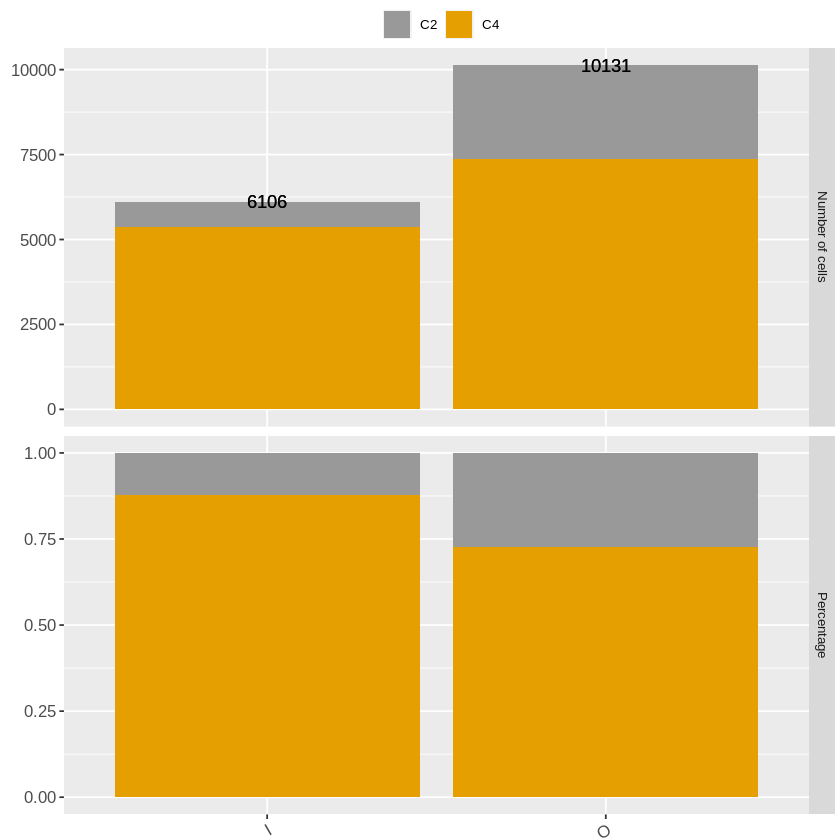

In [10]:
DemoPlot(eset.sc, cluster = "Cluster", sample = "SAMP", select.ct = c("C2","C4"))

In [11]:
celltype_list <- c("C2", "C4")

In [12]:
bulkseger.scxin <- SCDC_prop(bulk.eset = eset, sc.eset = eset.sc, ct.varname = "Cluster",
                             sample = "SAMP", ct.sub = celltype_list)

Creating Basis Matrix adjusted for maximal variance weight

Used 29618 common genes...

Used 2 cell types in deconvolution...

pESC_LWJ7.1 has common genes 19659 ...

WNNLS Converged at iteration 1

pESC_LWJ9.1 has common genes 19612 ...

WNNLS Converged at iteration 4

pESC_LWJ9.5 has common genes 19899 ...

WNNLS Converged at iteration 1

pESC_LWJ9.8 has common genes 19455 ...

WNNLS Converged at iteration 2

pTS_LWJ11.3 has common genes 18515 ...

WNNLS Converged at iteration 1

CRR271367 has common genes 23063 ...

WNNLS Converged at iteration 2

CRR271368 has common genes 22113 ...

WNNLS Converged at iteration 1

CRR271369 has common genes 26079 ...

WNNLS Converged at iteration 2

CRR271370 has common genes 25227 ...

WNNLS Converged at iteration 4

SRR7851661 has common genes 20042 ...

WNNLS Converged at iteration 1

SRR7851662 has common genes 20078 ...

WNNLS Converged at iteration 1

SRR7851663 has common genes 20110 ...

WNNLS Converged at iteration 1

SRR7851664 has commo

In [13]:
result_table <- as.data.frame(bulkseger.scxin$prop.est.mvw)

In [14]:
result_table$Sample <- rownames(result_table)

In [15]:
result_to_plot <-result_table %>%
  pivot_longer(cols = 0:2) %>%
  filter_all(any_vars(value != 0))

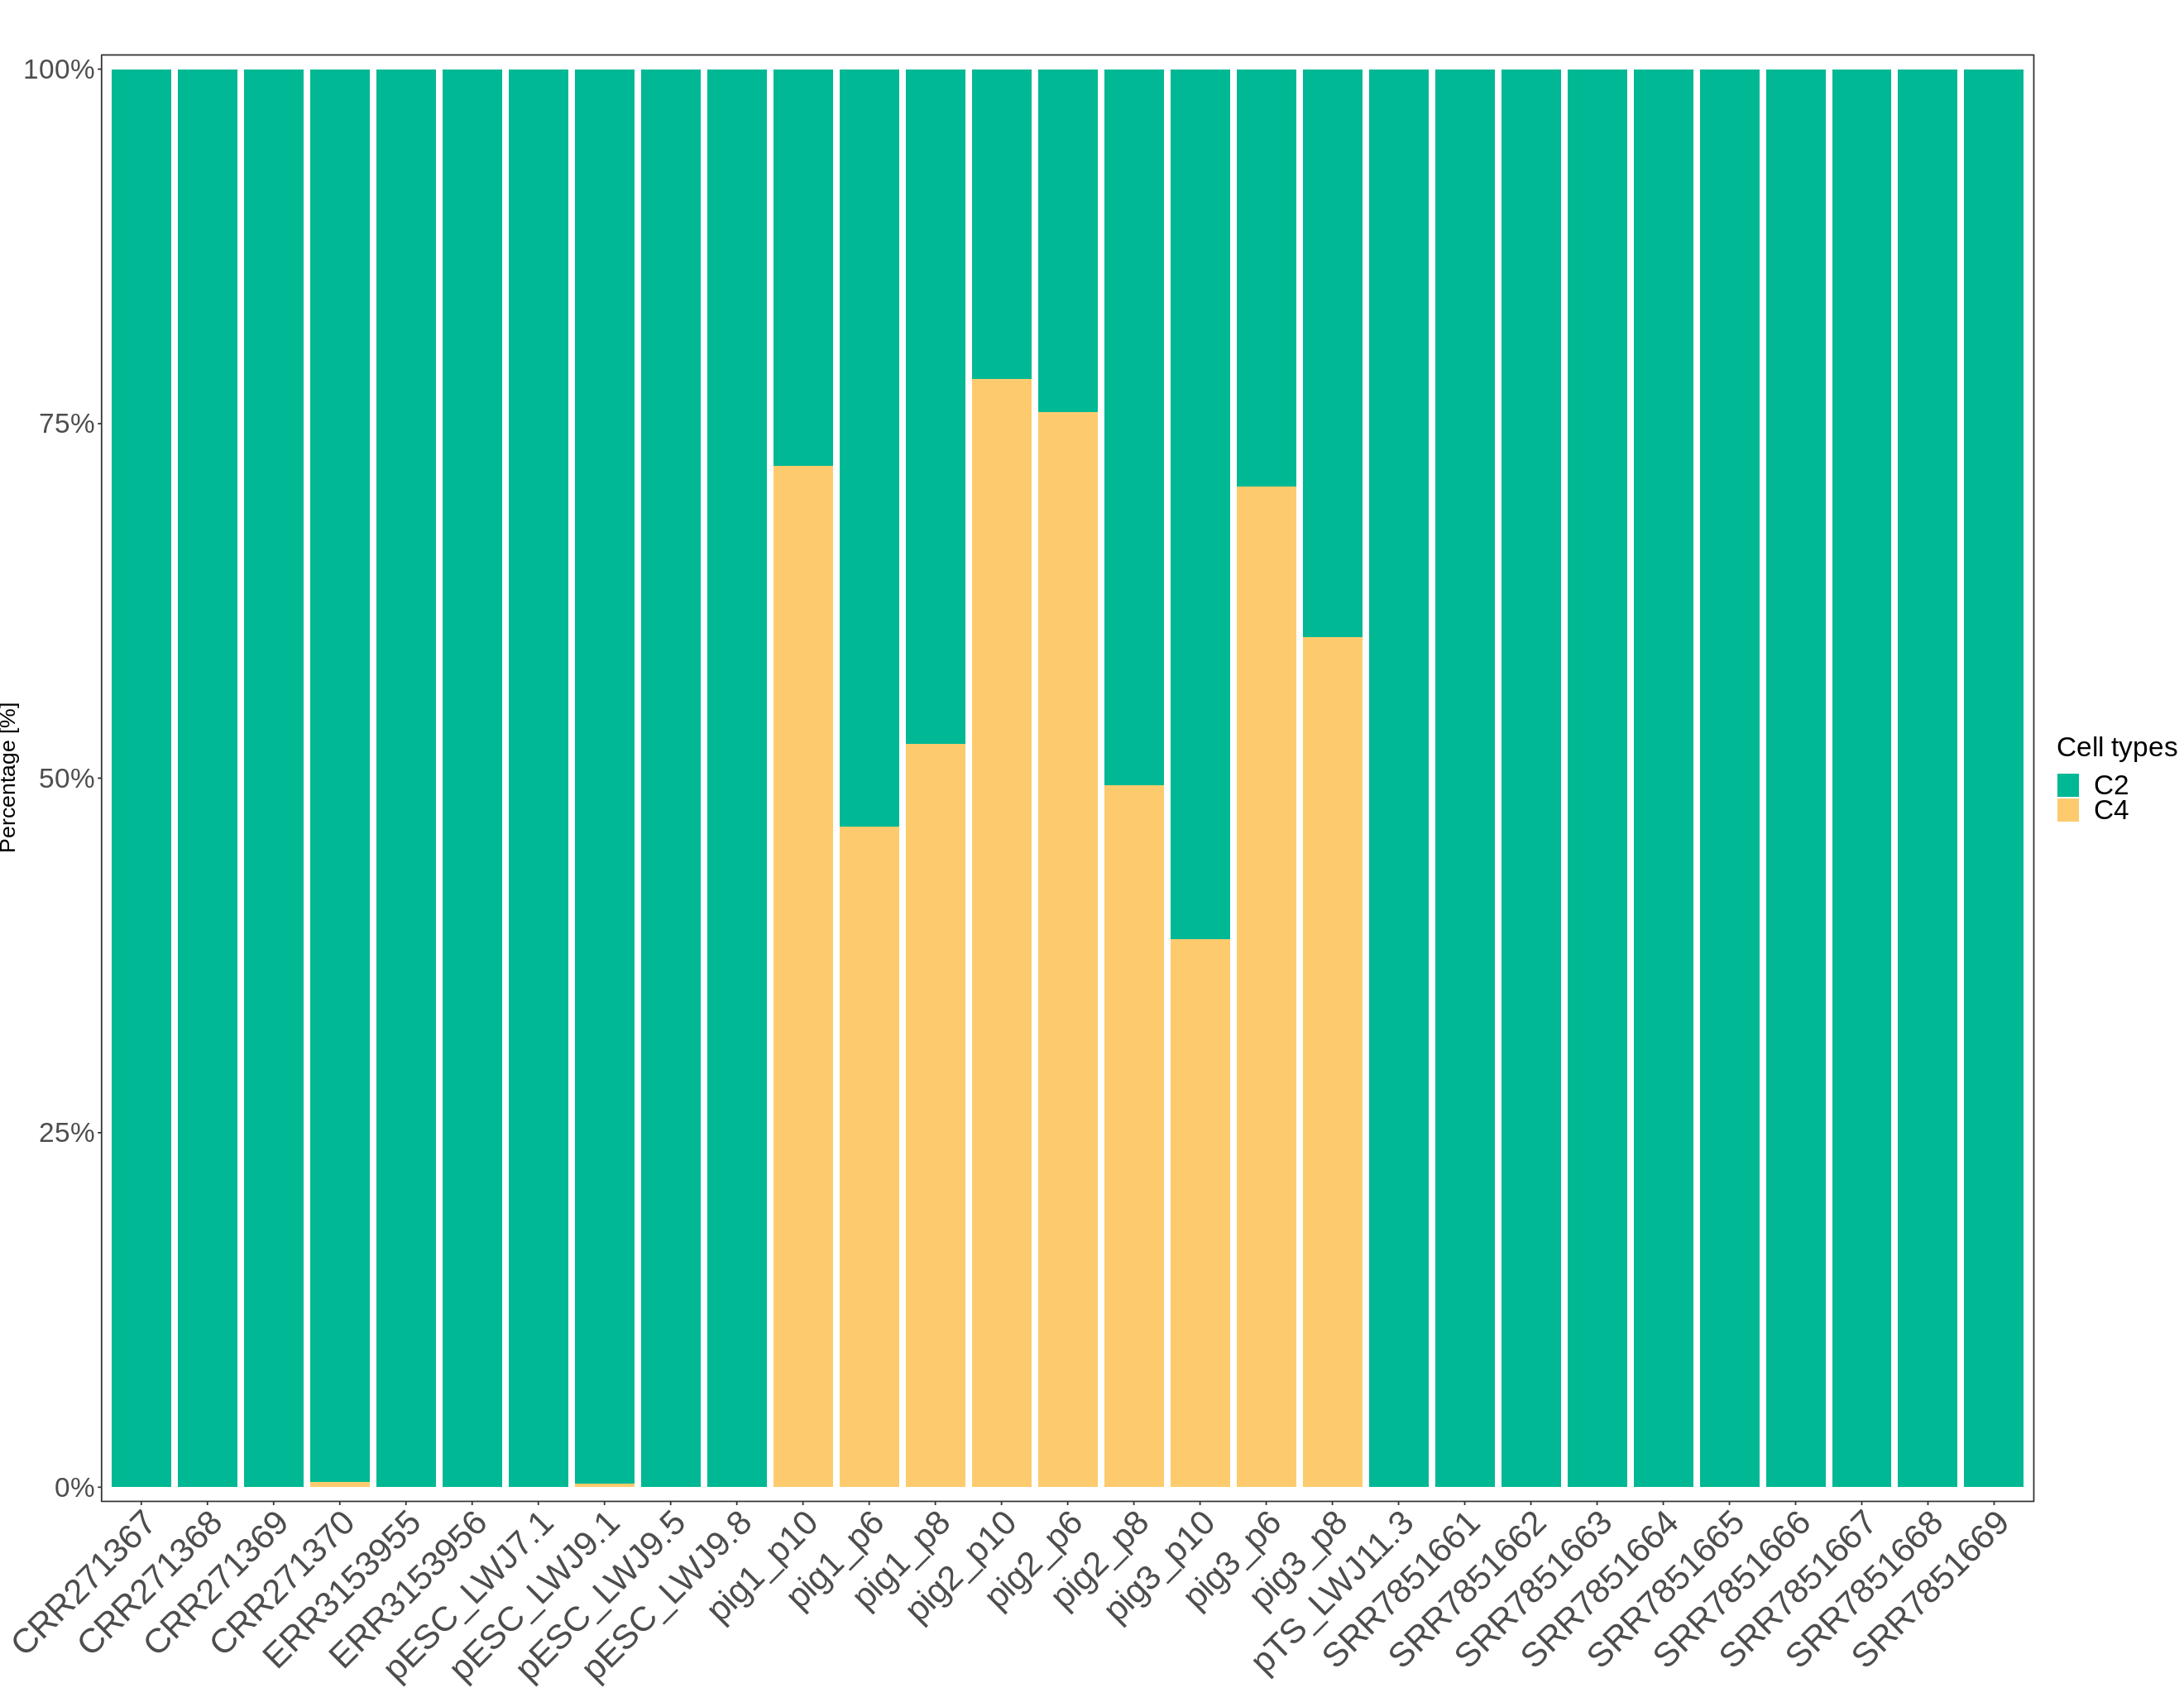

In [16]:
options(repr.plot.width = 22, repr.plot.height = 17, repr.plot.pointsize = 24)
plot <- ggplot(result_to_plot, aes(x=Sample, y=value, fill=name)) +
    geom_bar(position="fill", stat="identity") +
    scale_fill_manual(name = 'Cell types', values = c("#00b894", "#fdcb6e")) +
    scale_y_continuous(name = 'Percentage [%]', labels = scales::percent_format(), expand = c(0.01,0)) +
    coord_cartesian(clip = 'off') +
    theme_bw() +
    theme(
        legend.position = 'right',
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        text = element_text(size = 16),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 13, hjust = 0.5, vjust = 3.5, face = "bold"),
        axis.title.x = element_blank(),
        axis.text.x = element_text(size = 25, angle = 45, hjust = 1, vjust = 1),
        axis.text.y = element_text(size = 20),
        plot.margin = margin(t = 40, r = 0, b = 0, l = 0, unit = 'pt')
    )
plot

In [18]:
ggsave("/home/adufour/work/notebook/plots/bulk_esc/proportion_bulk_lignage.svg", plot, height = 16, width = 16)